In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib as plt

In [2]:
fraud=pd.read_csv("F:/Sampada/Sampada/Assignments/Decision Tree/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud[fraud.duplicated()].shape

(0, 6)

In [6]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [6]:
fraud=fraud.rename({'Marital.Status':'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation',
                    'Work.Experience':'WorkExperience'},axis=1)
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fraud.TaxableIncome.max()

99619

<AxesSubplot:>

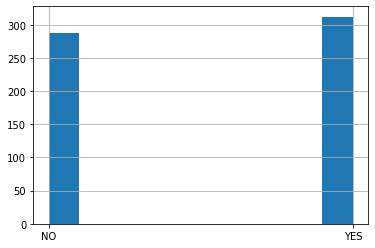

In [7]:
fraud['Undergrad'].hist()

In [11]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<AxesSubplot:>

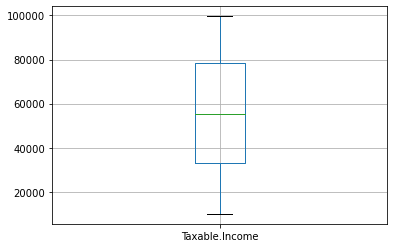

In [12]:
fraud.boxplot(column=['Taxable.Income'])

In [14]:
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

<AxesSubplot:>

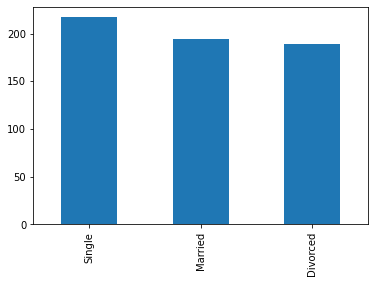

In [15]:
fraud['Marital.Status'].value_counts().plot.bar()

<AxesSubplot:>

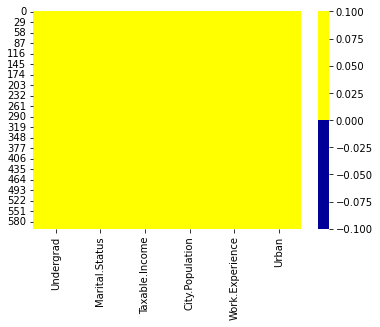

In [16]:
import seaborn as sns
cols = fraud.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(fraud[cols].isnull(),
            cmap=sns.color_palette(colours))

In [17]:
fraud[fraud.isnull().any(axis=1)].head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [18]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [19]:
mean = fraud['City.Population'].mean()
print(mean)

108747.36833333333


In [20]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


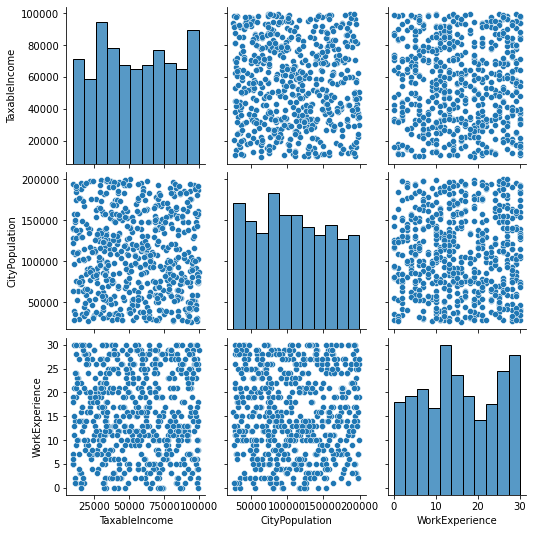

In [8]:
sns.pairplot(fraud)

In [9]:
fraud.TaxableIncome=pd.cut(fraud.TaxableIncome,bins=[0,30000,100000],labels=['Good','Risky'])
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,Risky,50047,10,YES
1,YES,Divorced,Risky,134075,18,YES
2,NO,Married,Risky,160205,30,YES
3,YES,Single,Risky,193264,15,YES
4,NO,Married,Risky,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Risky,39492,7,YES
596,YES,Divorced,Risky,55369,2,YES
597,NO,Divorced,Risky,154058,0,YES
598,YES,Married,Risky,180083,17,NO


In [10]:
cols=['Undergrad','MaritalStatus','TaxableIncome','Urban']
fraud[cols]=fraud[cols].apply(LabelEncoder().fit_transform)
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [11]:
x=fraud.iloc[:,np.r_[0:2,3:6]]
y=fraud.iloc[:,2]
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=40)

In [13]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)

In [14]:
model=model_gini.fit(x_train,y_train)

In [15]:
pred1=model.predict(x_test)

In [16]:
np.mean(pred1==y_test)

0.8166666666666667

In [17]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90        60

    accuracy                           0.82        60
   macro avg       0.50      0.41      0.45        60
weighted avg       1.00      0.82      0.90        60



C:\Users\sonali jante\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonali jante\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonali jante\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
pred2=model.predict(x_train)
np.mean(pred2==y_train)

0.7981481481481482

In [19]:
print(classification_report(pred2,y_train))

              precision    recall  f1-score   support

           0       0.04      0.83      0.08         6
           1       1.00      0.80      0.89       534

    accuracy                           0.80       540
   macro avg       0.52      0.82      0.49       540
weighted avg       0.99      0.80      0.88       540



[Text(0.4583333333333333, 0.875, 'X[2] <= 60294.5\ngini = 0.331\nsamples = 540\nvalue = [113, 427]'),
 Text(0.25, 0.625, 'X[2] <= 54275.0\ngini = 0.245\nsamples = 112\nvalue = [16, 96]'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 53980.5\ngini = 0.3\nsamples = 87\nvalue = [16, 71]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.288\nsamples = 86\nvalue = [15, 71]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.6666666666666666, 0.625, 'X[2] <= 64532.5\ngini = 0.351\nsamples = 428\nvalue = [97, 331]'),
 Text(0.5, 0.375, 'X[2] <= 63521.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 140941.5\ngini = 0.343\nsamples = 418\nvalue = [92, 326]'),
 Text(0.75, 0.125, 'gini = 0.366\nsamples = 261\nv

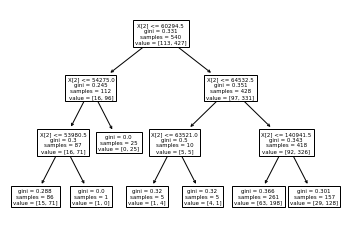

In [24]:
tree.plot_tree(model_gini)